In [2]:
!pip install scikit-learn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("cleaned_superstore_data.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

In [5]:
features = ['Sales', 'Quantity', 'Discount', 'Year', 'Month', 'Day', 'Category']
target = 'Profit'

In [6]:
df_encoded = pd.get_dummies(df[features + [target]], columns=['Category'])

In [7]:
df_encoded.head()

,Sales,Quantity,Discount,Year,Month,Day,Profit,Category_Furniture,Category_Office Supplies,Category_Technology
0,261.9600,2,0.00,2016,11,8,41.9136,True,False,False
1,731.9400,3,0.00,2016,11,8,219.5820,True,False,False
2,14.6200,2,0.00,2016,6,12,6.8714,False,True,False
3,957.5775,5,0.45,2015,10,11,-383.0310,True,False,False
4,22.3680,2,0.20,2015,10,11,2.5164,False,True,False


In [8]:
X = df_encoded[['Sales', 'Quantity', 'Discount', 'Year', 'Month', 'Day', 'Category_Furniture', 'Category_Office Supplies' , 'Category_Technology']]
y = df_encoded['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=49)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.2f}")

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", importance.head(10))

R² Score: 0.83
Mean Absolute Error: $23.33

Feature Importance:
 Sales                       0.611426
Discount                    0.253527
Quantity                    0.033925
Day                         0.027912
Month                       0.026312
Year                        0.022677
Category_Furniture          0.009134
Category_Technology         0.008721
Category_Office Supplies    0.006367
dtype: float64


In [10]:
# Example: Predict profit for a new order
new_order = {
    'Sales': 600,
    'Quantity': 2,
    'Discount': 0.1,
    'Year': 2025,
    'Month': 6,
    'Day': 15,
    'Category_Furniture': 1,
    'Category_Office Supplies': 0,
    'Category_Technology': 0
}

new_data = pd.DataFrame([new_order])
predicted_profit = model.predict(new_data)
print(f"Predicted Profit: ${predicted_profit[0]:.3f}")

Predicted Profit: $126.466


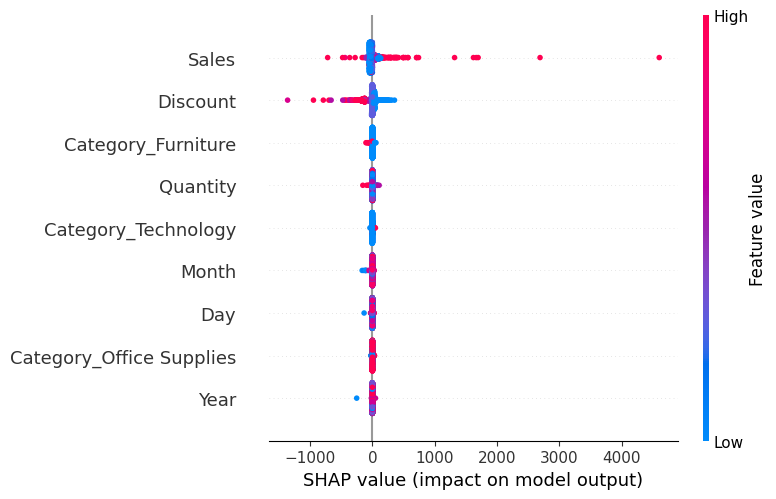

In [10]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

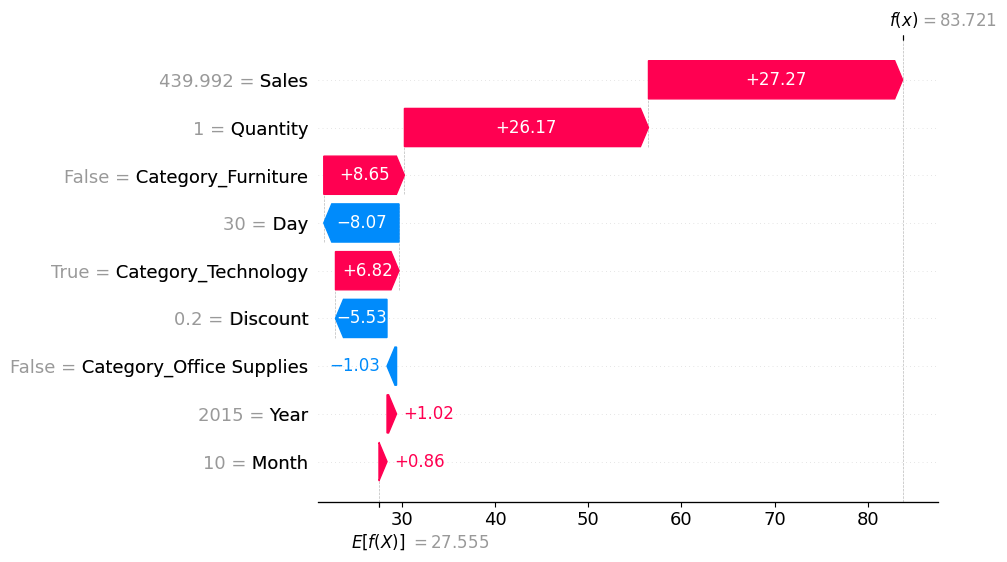

In [13]:
shap.plots.waterfall(shap_values[0])